In [1]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [2]:
path = "scenes"
# change the working directory to the path where the images are located
# os.chdir(path)

# this list holds all the image filename
frames = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            frames.append(file.name)

In [5]:
img = load_img("scenes/"+frames[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)

(224, 224, 3)


In [7]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

(1, 224, 224, 3)


In [8]:
x = preprocess_input(reshaped_img)

In [9]:
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

553476096/553467096 [==============================] - 40s 0us/step


In [52]:
def extract_features(file, model):

    # load the image as a 224x224 array
    img = load_img("scenes/"+file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 

    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
#     print('',reshaped_img.size)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)

    return features

In [53]:
data = {}
p = "frame_features.pkl"

# lop through each image in the dataset
for frame in frames:
    # try to extract the features and update the dictionary
    try:
#         print(frame)
        feat = extract_features(frame,model)
        print('>',feat)
        data[frame] = feat
 
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
          
        
        
print(data)
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape
(210, 1, 4096)

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
print(feat.shape)
# (210, 4096)

# get the unique labels (from the flower_labels.csv)
# df = pd.read_csv('flower_labels.csv')
# label = df['label'].tolist()
# unique_labels = list(set(label))


> [[0.59729534 0.         0.8751748  ... 0.         0.         1.5684242 ]]
> [[0.02192575 1.7837994  0.         ... 0.         0.44510418 0.        ]]
> [[0.22029185 0.         2.0178638  ... 0.         0.         1.9637682 ]]
> [[1.1145008  0.         0.59654117 ... 0.         0.6167691  0.7090227 ]]
> [[1.1691248 0.        2.1578827 ... 0.        0.        1.4526503]]
> [[0.05871356 0.         2.1074946  ... 0.         0.         1.0593157 ]]
> [[0.         0.         0.80736494 ... 0.         0.         0.84287083]]
> [[0.5244388  0.         1.7444133  ... 0.         0.         0.80260736]]
> [[0.2865798 0.        0.2243936 ... 0.        0.        2.2549496]]
> [[0.07383204 0.         1.8279864  ... 0.         0.         3.1396518 ]]
> [[1.8119893 0.        1.4248525 ... 0.        2.2650113 2.9448566]]
> [[2.599168  0.        1.7377423 ... 0.        0.        1.2855976]]
> [[1.9083606  0.         1.4791822  ... 0.46576887 0.         0.48360825]]
> [[0.5695167  0.         3.0377111 

> [[0.         0.         0.8333607  ... 0.72229797 1.9725533  0.        ]]
> [[0.         0.         2.6829586  ... 0.9246867  0.31619623 1.0381352 ]]
> [[0.         0.         2.003346   ... 1.5152922  0.12723222 0.8000046 ]]
> [[0.         0.38315016 2.2432637  ... 1.0406005  0.77073514 0.6997794 ]]
> [[0.         1.5021845  1.4854445  ... 0.15521044 2.1963158  0.        ]]
> [[0.         1.4744887  3.2346396  ... 1.012492   2.4148858  0.98333794]]
> [[0.25406367 0.9823822  1.3975103  ... 0.         2.685198   0.        ]]
> [[0.11825711 2.7407727  3.2414904  ... 0.         2.6645901  0.08506876]]
> [[0.3312697  3.2227654  3.8452754  ... 0.69784254 3.14429    1.0256789 ]]
> [[0.70397156 2.6540878  2.2321286  ... 0.         3.842566   0.06451839]]
> [[0.1936326  3.380094   3.777646   ... 0.01912463 4.1569705  0.        ]]
> [[1.1540759  3.3057456  3.4235148  ... 0.35312814 3.3360193  0.03591996]]
> [[1.2590241  1.0110031  2.9872928  ... 1.7650998  2.7996807  0.20190912]]
> [[1.151777

In [16]:
unique_labels = []
for i in frames:
    unique_labels.append(i.split('-')[2])

In [18]:
unique_labels = list(set(unique_labels))

In [22]:
feat

array([], shape=(0, 4096), dtype=float64)

In [54]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [56]:
pca.n_components

100

In [61]:
kmeans = KMeans(n_clusters=20,n_jobs=-1, random_state=22)
kmeans.fit(x)

C:\Users\ojubh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=20, n_jobs=-1, random_state=22)

In [62]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [63]:
groups[5]

['vid2-Scene-005-03.jpg',
 'vid2-Scene-023-02.jpg',
 'vid2-Scene-023-03.jpg',
 'vid2-Scene-024-01.jpg',
 'vid2-Scene-024-02.jpg',
 'vid2-Scene-024-03.jpg',
 'vid2-Scene-025-01.jpg']

In [67]:
groups

{11: ['vid2-Scene-001-01.jpg',
  'vid2-Scene-001-02.jpg',
  'vid2-Scene-001-03.jpg',
  'vid2-Scene-002-01.jpg',
  'vid2-Scene-002-02.jpg',
  'vid2-Scene-002-03.jpg',
  'vid2-Scene-003-01.jpg',
  'vid2-Scene-003-02.jpg',
  'vid2-Scene-003-03.jpg',
  'vid2-Scene-004-01.jpg'],
 2: ['vid2-Scene-004-02.jpg',
  'vid2-Scene-006-01.jpg',
  'vid2-Scene-008-03.jpg',
  'vid2-Scene-009-01.jpg',
  'vid2-Scene-009-02.jpg',
  'vid2-Scene-009-03.jpg',
  'vid2-Scene-010-01.jpg',
  'vid2-Scene-010-03.jpg',
  'vid2-Scene-011-01.jpg',
  'vid2-Scene-011-02.jpg',
  'vid2-Scene-015-02.jpg',
  'vid2-Scene-035-03.jpg',
  'vid2-Scene-036-01.jpg',
  'vid2-Scene-036-02.jpg',
  'vid2-Scene-036-03.jpg',
  'vid2-Scene-037-01.jpg',
  'vid2-Scene-037-02.jpg'],
 17: ['vid2-Scene-004-03.jpg', 'vid2-Scene-005-01.jpg'],
 6: ['vid2-Scene-005-02.jpg',
  'vid2-Scene-033-03.jpg',
  'vid2-Scene-034-01.jpg',
  'vid2-Scene-034-02.jpg',
  'vid2-Scene-034-03.jpg',
  'vid2-Scene-035-01.jpg',
  'vid2-Scene-042-02.jpg',
  'vid2-Scene

In [70]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2).fit_transform(feat)


In [72]:
def scale_to_01_range(x):

    value_range = (np.max(x) - np.min(x))

    starts_from_zero = x - np.min(x)

    return starts_from_zero / value_range

tx = tsne[:, 0]

ty = tsne[:, 1]

tx = scale_to_01_range(tx)

ty = scale_to_01_range(ty)


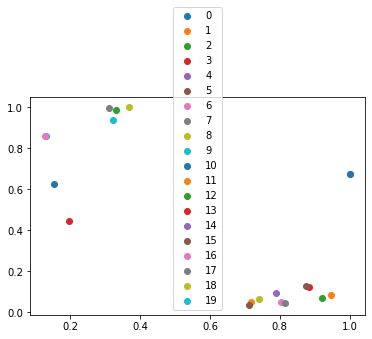

In [74]:
# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)

# for every class, we'll add a scatter plot separately
for label in range(20):
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(groups) if l == label]

    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)

    # convert the class color to matplotlib format
#     color = np.array(colors_per_class[label], dtype=np.float) / 255

    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, label=label)

# build a legend using the labels we set previously
ax.legend(loc='best')

# finally, show the plot
plt.show()

In [79]:
import tqdm
# Compute the coordinates of the image on the plot
def compute_plot_coordinates(image, x, y, image_centers_area_size, offset):
    image_height, image_width, _ = image.shape

    # compute the image center coordinates on the plot
    center_x = int(image_centers_area_size * x) + offset

    # in matplotlib, the y axis is directed upward
    # to have the same here, we need to mirror the y coordinate
    center_y = int(image_centers_area_size * (1 - y)) + offset

    # knowing the image center,
    # compute the coordinates of the top left and bottom right corner
    tl_x = center_x - int(image_width / 2)
    tl_y = center_y - int(image_height / 2)

    br_x = tl_x + image_width
    br_y = tl_y + image_height

    return tl_x, tl_y, br_x, br_y

# we'll put the image centers in the central area of the plot
# and use offsets to make sure the images fit the plot

# init the plot as white canvas
tsne_plot = 255 * np.ones((224,224, 3), np.uint8)

# now we'll put a small copy of every image to its corresponding T-SNE coordinate
for image_path, label, x, y in tqdm(
        zip(groups, unique_labels, tx, ty),
        desc='Building the T-SNE plot',
        total=len(groups)
):
    image = cv2.imread("scenes/"+image_path)

    # scale the image to put it to the plot
    image = scale_image(image, max_image_size)

    # draw a rectangle with a color corresponding to the image class
    image = draw_rectangle_by_class(image, label)

    # compute the coordinates of the image on the scaled plot visualization
    tl_x, tl_y, br_x, br_y = compute_plot_coordinates(image, x, y, image_centers_area_size, offset)

    # put the image to its t-SNE coordinates using numpy sub-array indices
    tsne_plot[tl_y:br_y, tl_x:br_x, :] = image

cv2.imshow('t-SNE', tsne_plot)
cv2.waitKey()


TypeError: 'module' object is not callable